In [22]:
import numpy as np

def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.show()

In [23]:
path_to_train = '../../data/USPS_train.txt'
path_to_test = '../../data/USPS_test.txt'

X_train, y_train = load_usps(path_to_train)
X_test, y_test = load_usps(path_to_test)

In [24]:
print(X_train.shape)
print(y_train.shape)

(7291, 256)
(7291,)


In [25]:
from src.SequentielNet import Sequentiel, Optim, SGD
from src.LinearModel import Linear
from src.Loss import CELossSoftMax
from src.NonLinearModel import Tanh, Sigmoid
import matplotlib.pyplot as plt
import numpy as np

In [26]:
batch = 64
input = 256
output1 = 128
output2 = 64
output3 = 20
output4 = 10

epochs = 200

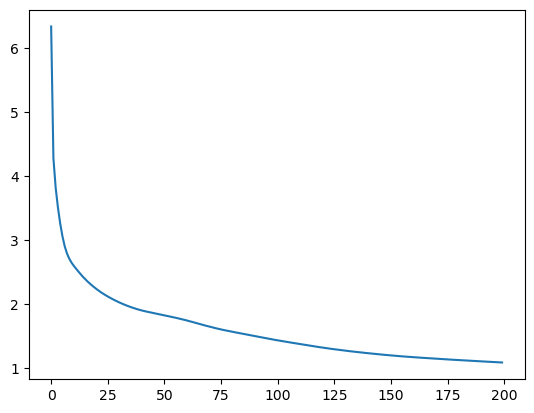

In [27]:
net = Sequentiel(Linear(input, output1), Sigmoid(), Linear(output1, output2), Sigmoid(), Linear(output2, output3), Sigmoid(), Linear(output3, output4))
optim = Optim(net, CELossSoftMax(), 0.1)
scores = []

for iteration in range(epochs):
    optim.clean_output()
    optim.zero_score()
    optim.step(X_train, y_train)
    optim.update_output()
    scores.append(optim.score.sum())


plt.plot(np.arange(epochs), scores)
plt.show()


In [28]:
optim.yhat

array([[ 0.51169288, -0.0133454 ,  1.45154227, ..., -0.42538873,
        -1.30256193, -2.93315243],
       [ 1.49039883, -0.73223057,  0.91468998, ..., -1.01546354,
        -1.49019335, -1.82409765],
       [ 1.30881698, -5.66454128, -0.35437255, ..., -0.37596893,
        -0.53769227,  0.28802092],
       ...,
       [ 1.10492673, -2.64493859,  0.61863902, ...,  0.87963131,
         1.32492992,  1.19576788],
       [ 3.27499946, -0.88588675, -0.55772896, ..., -1.07079984,
        -1.15797682,  0.78569729],
       [-2.67175225,  2.99395349,  0.69721134, ...,  0.78655156,
         0.51895161, -1.02069248]])

In [29]:
def softmax(X):
    return np.exp(X) / np.exp(X).sum()

In [30]:
print(softmax(optim.yhat))

[[8.00505255e-06 4.73525054e-06 2.04896996e-05 ... 3.13613549e-06
  1.30449776e-06 2.55438809e-07]
 [2.13015293e-05 2.30746488e-06 1.19779806e-05 ... 1.73831542e-06
  1.08132451e-06 7.74360605e-07]
 [1.77644100e-05 1.66364161e-08 3.36695066e-06 ... 3.29501627e-06
  2.80299297e-06 6.40065901e-06]
 ...
 [1.44877979e-05 3.40766238e-07 8.90861738e-06 ... 1.15653245e-05
  1.80529653e-05 1.58655155e-05]
 [1.26897477e-04 1.97880531e-06 2.74738920e-06 ... 1.64473652e-06
  1.50742549e-06 1.05284100e-05]
 [3.31750460e-07 9.58067867e-05 9.63682187e-06 ... 1.05374080e-05
  8.06337053e-06 1.72924960e-06]]


In [31]:
from sklearn.metrics import accuracy_score

#### Train set accuracy

In [32]:
pred = np.argmax(softmax(optim.yhat), axis=1)
print(f'accuracy : {accuracy_score(y_train, pred)}')

accuracy : 0.6868742285008915


In [33]:
pred[1]

6

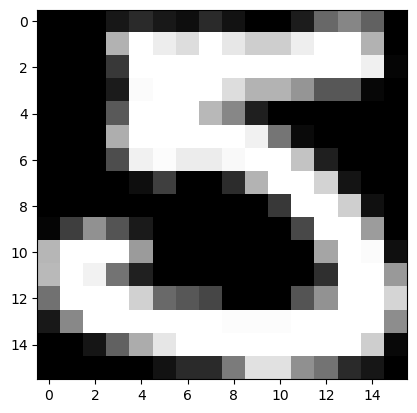

In [34]:
show_usps(X_train[1])

#### Test set accuracy

In [35]:
optim.clean_output()
optim.step(X_test, y_test)
optim.update_output()

pred_test = np.argmax(softmax(optim.yhat), axis=1)
print(f'accuracy : {accuracy_score(y_test, pred_test)}')

accuracy : 0.6447433981066268


#### SGD

In [36]:
net2 = Sequentiel(Linear(input, output1), Sigmoid(), Linear(output1, output2), Sigmoid(), Linear(output2, output3), Sigmoid(), Linear(output3, output4))

optim2 = SGD(net2, X_train, y_train, batch, epochs, CELossSoftMax(), eps=0.1)

D:\SchoolWork\M1S2\ML\M1S2-ML-Projet\src\NonLinearModel.py:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


In [37]:
print(optim2.score)

39.02138302309652


#### Train set accuracy

In [38]:
pred = np.argmax(softmax(optim2.yhat), axis=1)
print(f'accuracy : {accuracy_score(y_train, pred)}')

accuracy : 0.9057742422164312


#### Test set accuracy

In [39]:
optim2.clean_output()
optim2.step(X_test, y_test)
optim2.update_output()

pred_test = np.argmax(softmax(optim2.yhat), axis=1)
print(f'accuracy : {accuracy_score(y_test, pred_test)}')

accuracy : 0.8555057299451918


D:\SchoolWork\M1S2\ML\M1S2-ML-Projet\src\NonLinearModel.py:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


**We can find that the method with batch which split the data set has greater performance than that without batch (within the same iterations).**
**Because of the split of the data set, this method has more implicit learning iterations.**

In [42]:
pred_test[1224]

3

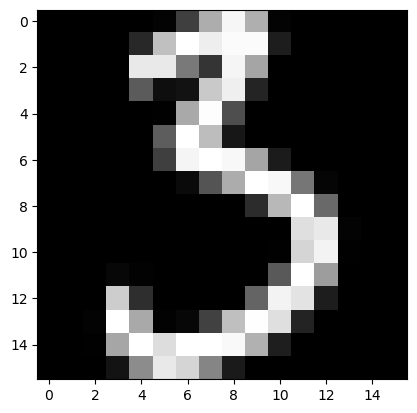

In [43]:
show_usps(X_test[1224])